# Part I - (Prosper Loan Data Exploration)
## by (Okechukwu Victory)

## Introduction
> Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

>The prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading of dataset
loans = pd.read_csv('prosperLoanData.csv')

#### Overview of Dataset

In [3]:
# Dataset shape
loans.shape

(113937, 81)

In [4]:
# Taking a look of the dataset
loans.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


#### Dropping of unwated columns

In [5]:
# Making a list of the columns needed
loan_cols = ['Term', 'LoanStatus','BorrowerRate',
             'BorrowerState','EmploymentStatus',
             'IsBorrowerHomeowner','StatedMonthlyIncome',
             'MonthlyLoanPayment','CreditScoreRangeLower',
             'LoanOriginalAmount','LoanCurrentDaysDelinquent',
             'EmploymentStatusDuration','AvailableBankcardCredit']
# Dropping the columns not needed
df = loans.drop(loans.columns.difference(loan_cols),axis=1)

In [6]:
# New Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   BorrowerState              108422 non-null  object 
 4   EmploymentStatus           111682 non-null  object 
 5   EmploymentStatusDuration   106312 non-null  float64
 6   IsBorrowerHomeowner        113937 non-null  bool   
 7   CreditScoreRangeLower      113346 non-null  float64
 8   AvailableBankcardCredit    106393 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  LoanCurrentDaysDelinquent  113937 non-null  int64  
 11  LoanOriginalAmount         113937 non-null  int64  
 12  MonthlyLoanPayment         113937 non-null  float64
dtypes: bool(1), float64(6), int64

In [7]:
# Taking a look of the new dataset
df.head()

,Term,LoanStatus,BorrowerRate,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,AvailableBankcardCredit,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment
0,36,Completed,0.1580,CO,Self-employed,2.0,True,640.0,1500.0,3083.333333,0,9425,330.43
1,36,Current,0.0920,CO,Employed,44.0,False,680.0,10266.0,6125.000000,0,10000,318.93
2,36,Completed,0.2750,GA,Not available,NaN,False,480.0,NaN,2083.333333,0,3001,123.32
3,36,Current,0.0974,GA,Employed,113.0,True,800.0,30754.0,2875.000000,0,10000,321.45
4,36,Current,0.2085,MN,Employed,44.0,True,680.0,695.0,9583.333333,0,15000,563.97


#### Converting Loan status into an ordered category

In [8]:
# Checking the unique values in the main category
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [9]:
# Making a list of the categories in the loan status variable
loanstatus_classes = ['Completed', 'Current','FinalPaymentInProgress', 'Past Due (1-15 days)',
                      'Past Due (16-30 days)','Past Due (61-90 days)', 'Past Due (31-60 days)',
                      'Past Due (91-120 days)','Past Due (>120 days)', 'Cancelled','Defaulted','Chargedoff']

ls_classes = pd.api.types.CategoricalDtype(loanstatus_classes,True)

df['LoanStatus'] =df['LoanStatus'].astype(ls_classes)

### What is the structure of your dataset?

> The main dataset consists of 113,937 loans and 81 variables, after assessing the dataset, it was concluded that only 12 variables would be needed for the analysis, so the unwanted colums where dropped. These variables had data types of object, int, float and bool. 

> The LoanStatus variable was converted into an ordered category.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in my analysis is the LoanStatus variable. i want to determine the features that cause missing payments of loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> From past researches made, i expect the interest rate of loan and customers stated monthly income to be the main features that would affect the loan status. The loan term, employment status, loan original amount and monthly loan payment should also be able to affect the loan status. it would also be interesting to see how other variables like IsborrowerHomeOwner and state affect loan status

## Univariate Exploration

###### The main variable LoanStatus
Looking at the count of the different categories of the main variable LoanStatus

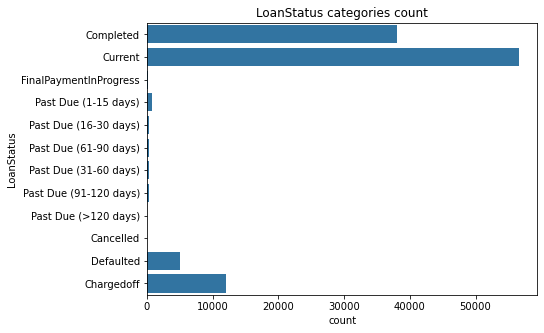

In [10]:
# Barchart for the counts of different categories
base_color = sb.color_palette()[0]
plt.figure(figsize=[7,5])
sb.countplot(data=df,y='LoanStatus',color=base_color)
plt.title('LoanStatus categories count');

In [11]:
# Checking the number of loans in each category
df.groupby('LoanStatus').size()

LoanStatus
Completed                 38074
Current                   56576
FinalPaymentInProgress      205
Past Due (1-15 days)        806
Past Due (16-30 days)       265
Past Due (61-90 days)       313
Past Due (31-60 days)       363
Past Due (91-120 days)      304
Past Due (>120 days)         16
Cancelled                     5
Defaulted                  5018
Chargedoff                11992
dtype: int64

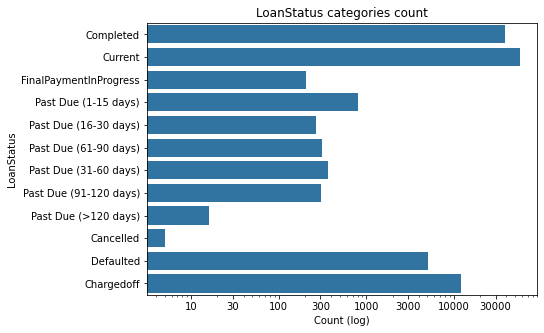

In [12]:
# Barchart of the log count of different categories
base_color = sb.color_palette()[0]
plt.figure(figsize=[7,5])
sb.countplot(data=df,y='LoanStatus',color=base_color)
plt.xscale('log')
ticks = [10,30,100,300,1000,3000,10000,30000]
plt.xticks(ticks,ticks)
plt.title('LoanStatus categories count')
plt.xlabel('Count (log)');

Taking a look at the loan status variable, the loans in the current category has the highest counts followed by the completed. looking further at the variables with lower counts, the various past due categories and cancelled have the lowest counts

##### The stated monthly income variable
Looking at the stated monthly income variable

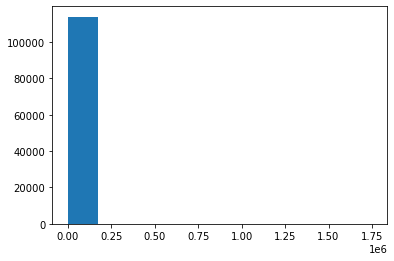

In [13]:
# Histogram of the stated monthly income variable
plt.hist(data=df,x='StatedMonthlyIncome');

In [14]:
# Descripton of the variable
df['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

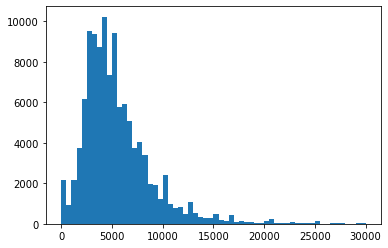

In [15]:
# Limiting histogram to 0 - 20,000 monthly
bins = np.arange(0,3e+4+0.25e+3,0.5e+3)
plt.hist(data=df,x='StatedMonthlyIncome',bins=bins);

A distribution of the stated monthly income variable shows that most of the borrowers monthly income range between 0 to 30,000 , peaking at about $4000. It also shows that the data is highly skewed to the right with few individuals earning out of this range. a borrower even earning 6 figures as monthly income

##### The BorrowerRate variable
Looking at the interest rate for the loans

In [16]:
# Checking the statistics of the borrower rate variable
df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

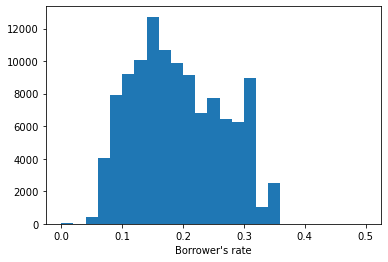

In [17]:
# Histogram of Borrower's rate variable
bins = np.arange(0,0.5+0.02,0.02)
plt.hist(data=df,x='BorrowerRate',bins=bins)
plt.xlabel("Borrower's rate");

The borrower rates are very few ranging from 0 to about 0.5, peaking at about 0.15

##### Loan original amount and monthly loan payment
Looking at other variables that might affect the loan status e.g The loan original amount and monthly loan payment

In [18]:
# Defining a function to create histograms
def plt_hist (data,x):
    plt.hist(data=data,x=x)
    plt.xlabel(x)

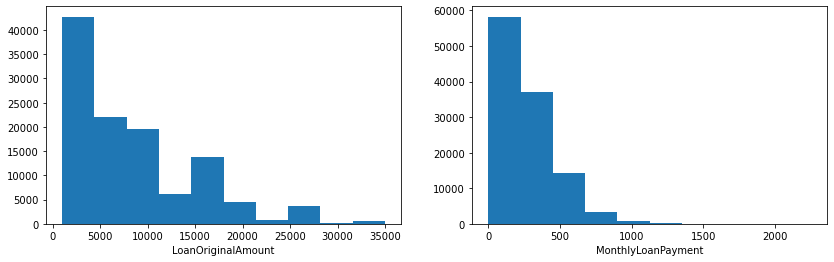

In [19]:
# Histogram of loan original amount and monthly loan payment
plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt_hist(df,'LoanOriginalAmount')
plt.subplot(1,2,2)
plt_hist(df,'MonthlyLoanPayment')

Both variables, the counts of the loan original amount and monthly loan payment are descending with increase in the variables. The highest point of Monthly loan payment is zero showing for completed loans while the highest loan original amount is 1000 showing the number of people with loans reduces as the amount increases

##### Credit score and bank card credit variable
Looking at the credit variables e.g credit score and available bank card credit variables

In [20]:
# Checking statistics of available bank card credit variable
df['AvailableBankcardCredit'].describe()

count    106393.000000
mean      11210.225447
std       19818.361309
min           0.000000
25%         880.000000
50%        4100.000000
75%       13180.000000
max      646285.000000
Name: AvailableBankcardCredit, dtype: float64

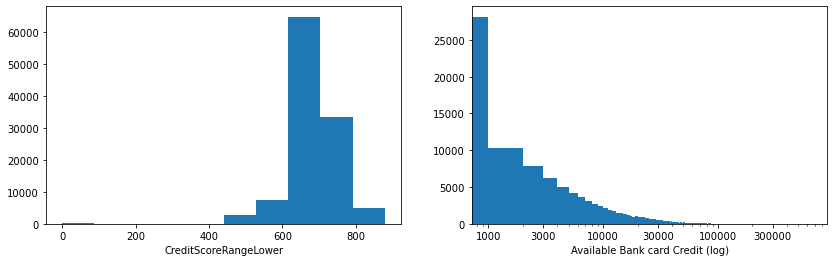

In [21]:
# Histogram of credit score and available bank card credit (log)
plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt_hist(df,'CreditScoreRangeLower')
plt.subplot(1,2,2)
bins = np.arange(0,650000,1000)
plt.hist(data=df , x='AvailableBankcardCredit',bins=bins)
ticks = [1000,3000,10000,30000,100000,300000]
plt.xscale('log')
plt.xlabel('Available Bank card Credit (log)')
plt.xticks(ticks,ticks);

The credit score variable shows the credit score of the various borrowers of loan, with minimum at 360 and maximum at about 880 except from the values at 0. The available bank card credit shows that most of the borrowers have very low bank carrd credit hence the need to borrow

##### The employment status and loan term
Looking at other variables that might affect the loan status e.g employment status and loan term

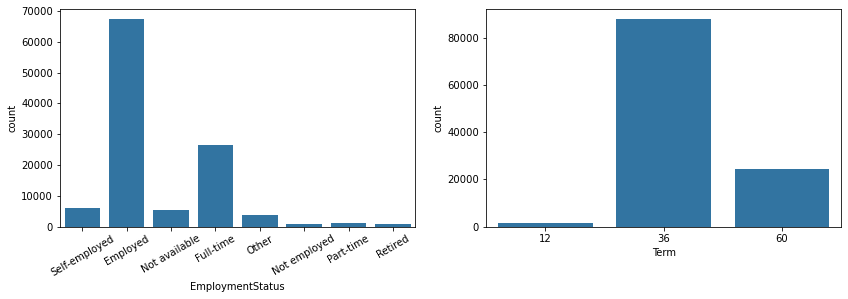

In [22]:
# Barchart of employment status ad loan term
plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
sb.countplot(data=df,x='EmploymentStatus',color=base_color)
plt.xticks(rotation=30)
plt.subplot(1,2,2)
sb.countplot(data=df,x='Term',color=base_color);

The employment status variable shows that most of the borrowers are employed and alot are full time, and most of the loan term taken is the three year loan term

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable of interest is a categorical variable showing that the completed loans have the highest count followed by the current loans. The various categories of past due loans have the lowest counts showing that most have been defaulted or charged off

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The stated monthly income was highly skewed to the right with most of the borrowers stated monthly income ranging from 0 to 20,000. outliers earning out of this range, with an outlier earning six figures monthly income

## Bivariate Exploration

##### Loan status and stated monthly income / Borrower rate
Looking at how the stated monthly income and borrower's rate relate with the main variable loan status

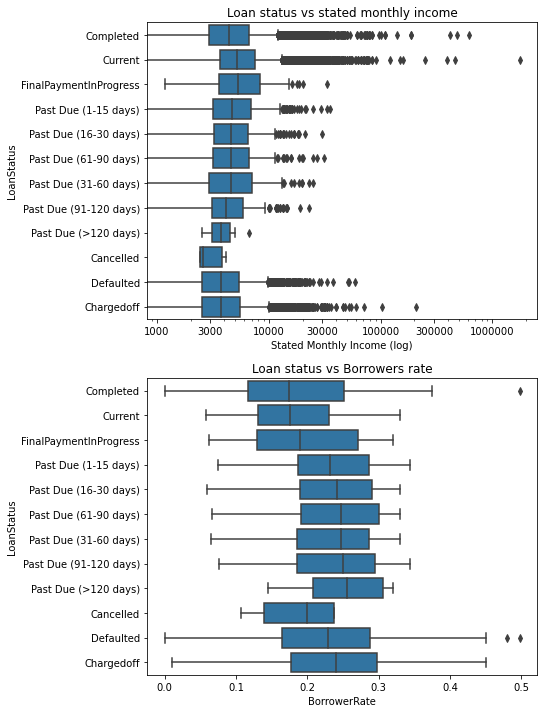

In [23]:
# Boxplot of loan status against stated monthly income/Borrowers rate
plt.figure(figsize=[7,12])
plt.subplot(2,1,1)
sb.boxplot(data=df,y='LoanStatus',x='StatedMonthlyIncome',color=base_color)
plt.xscale('log')
ticks = [1000,3000,10000,30000,100000,300000,1000000]
plt.xticks(ticks,ticks)
plt.xlabel('Stated Monthly Income (log)')
plt.title('Loan status vs stated monthly income')
plt.subplot(2,1,2)
sb.boxplot(data=df,y='LoanStatus',x='BorrowerRate',color=base_color)
plt.title('Loan status vs Borrowers rate');

It shows that with the exception of the cancelled category, the defaulted and charged off categories have the lowest mean of borrowers with stated monthly income, this shows that those with lower stated monthly income were more likely to default. Also the higher the borrower rate the higher the past due days .

##### Loan status and Term
Looking at the relationship between the main variable Loan status and loan terms

In [24]:
# Creating a sub-dataset for lineplot
df_line = df.groupby(['LoanStatus','Term']).size().reset_index(name='count')
df_line.head()

,LoanStatus,Term,count
0,Completed,12,1450
1,Completed,36,34200
2,Completed,60,2424
3,Current,12,62
4,Current,36,36387


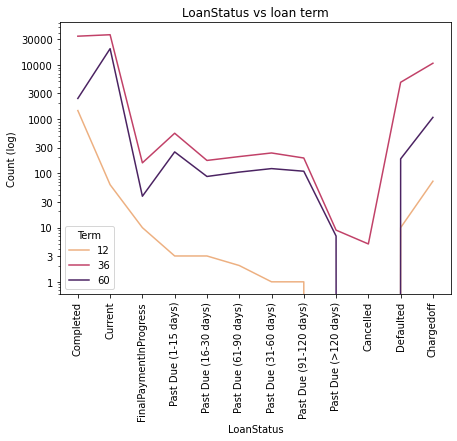

In [25]:
# Lineplot of loan status ad loan term
base_color = sb.color_palette()[0]
plt.figure(figsize=[7,5])
sb.lineplot(data=df_line,x='LoanStatus',y='count',hue='Term',palette='flare')
plt.yscale('log')
ticks= [1,3,10,30,100,300,1000,3000,10000,30000]
plt.yticks(ticks,ticks)
plt.ylabel('Count (log)')
plt.title('LoanStatus vs loan term')
plt.xticks(rotation=90);

This shows there is a similar trend for the different terms, across the various loan status categories with the 36 months term having the highest counts and 12 months term having the lowest counts. There is a general decrease in the number of borrowers followed by a spike increase in defaulted and charged off loans

##### Loan status and employment status
Looking at the relationship between the main varible loan status and employment status

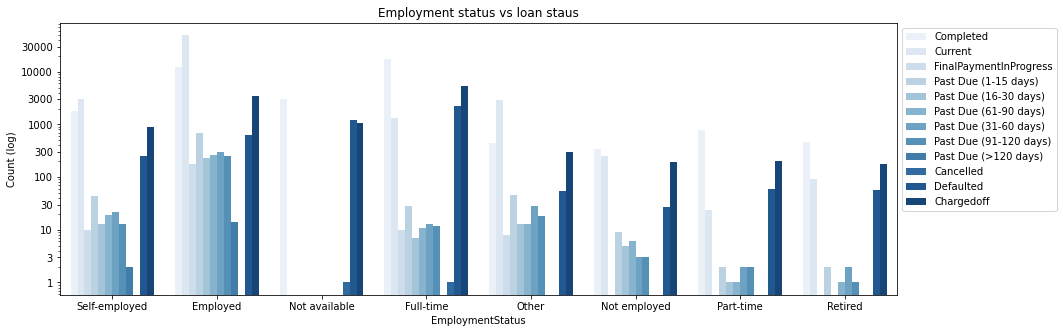

In [26]:
# Barchart of employment status and loan status
plt.figure(figsize=[15,5])
sb.countplot(data=df,x='EmploymentStatus',hue='LoanStatus',color=base_color,palette='Blues')
plt.legend(bbox_to_anchor=(1,1))
plt.yscale('log')
plt.ylabel('Count (log)')
ticks = [1,3,10,30,100,300,1000,3000,10000,30000]
plt.yticks(ticks,ticks)
plt.title('Employment status vs loan staus');

Each employment status category has its completed and current counts as its highest counts, followed by the defaulted and charged off counts. Suprisingly The full time category has the highest defaulted and charged off loans

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the relationship between the main variable loan status, the stated monthly income and borrowers rate, with the exception of the cancelled category, the defaulted and charged off categories have the lowest mean of borrowers with stated monthly income, this shows that those with lower stated monthly income were more likely to default or get charged off. Also the higher the borrower rate the higher the past due days showing higher rates causes higher days of loan deliquences.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the relationship between the Loan status, loan term and employment status, the 36 months term category has the highest counts of loan with the highest defaulted and charged off loans. In the emplyment status variable, the employed category has the highest counts of completed and current loan status while the full time category has the highest number of defaulted and charged off loans

## Multivariate Exploration

##### Relationship between borrowers rate and stated monthly income across the main variable loan status category

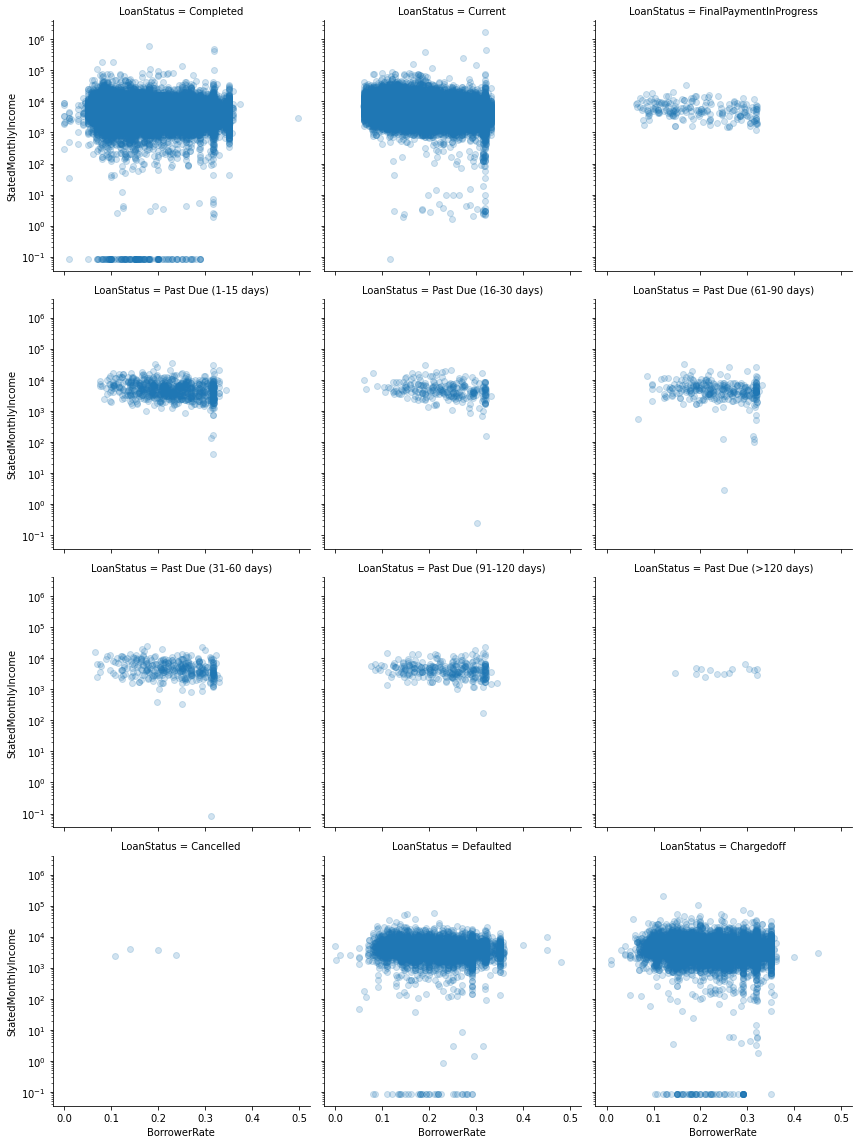

In [27]:
# Facet grid of scatter plots of stated monthly income against 
g = sb.FacetGrid(data=df,col='LoanStatus',height=4,col_wrap=3)
ticks = [0.1,1,10,100,1000,10000,100000,1000000]
g.map(plt.scatter,'BorrowerRate','StatedMonthlyIncome',alpha=1/5)
plt.yscale('log');

No reasonable correlation between the borrowers rate and stated mothly income, but it can be seen that there are various outliers in the defaulted and charged off category with high borrower's rate

##### Relationship between the loan status and employmet status across loan terms

In [28]:
df['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

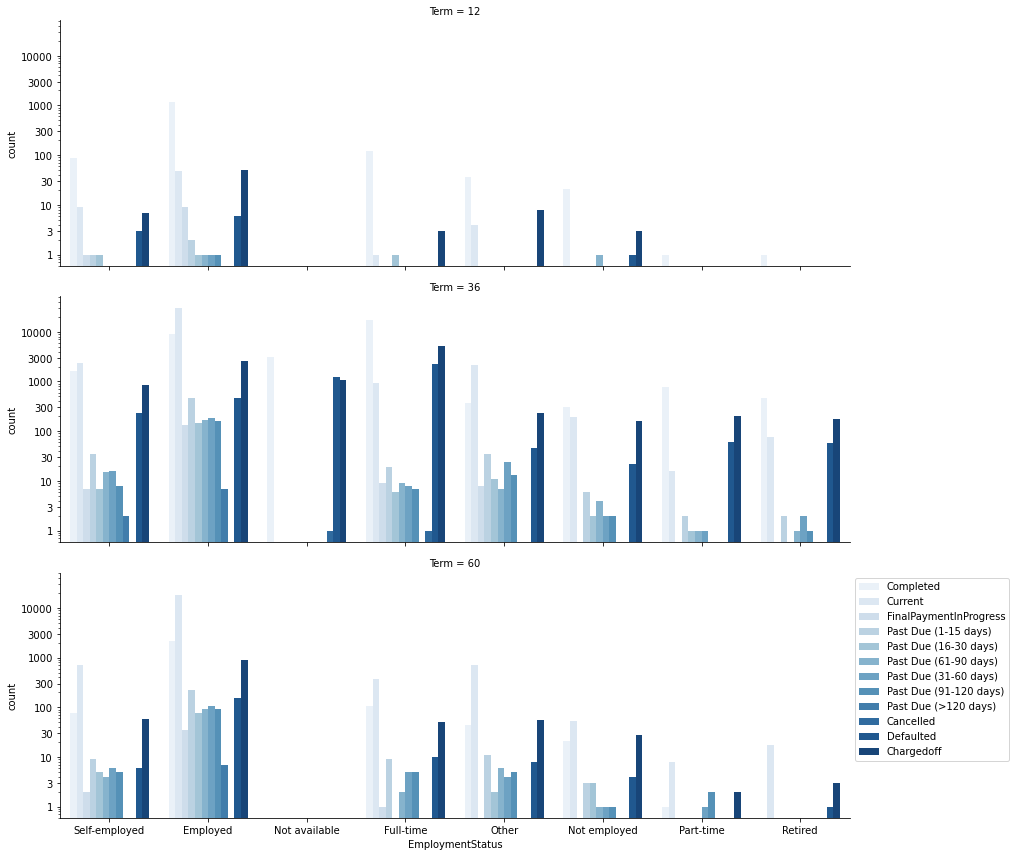

In [29]:
order = ['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', 'Not employed', 'Part-time', 'Retired']
g = sb.FacetGrid(data=df,col='Term',height=4,aspect=3,col_wrap=1)
g.map(sb.countplot,'EmploymentStatus',palette='Blues',order=order,hue=df['LoanStatus'])
plt.yscale('log')
ticks = [1,3,10,30,100,300,1000,3000,10000]
plt.yticks(ticks,ticks)
plt.legend(bbox_to_anchor=(1,1));

For the various loan terms, the completed and current loan status have the highest counts folowed by the defaulted and charged off loans. The borrowers working full time with the 36 months loan term have the highest defaulted and charged off loans

##### Relationship between loan status, stated monthly income, borrowers rate and term

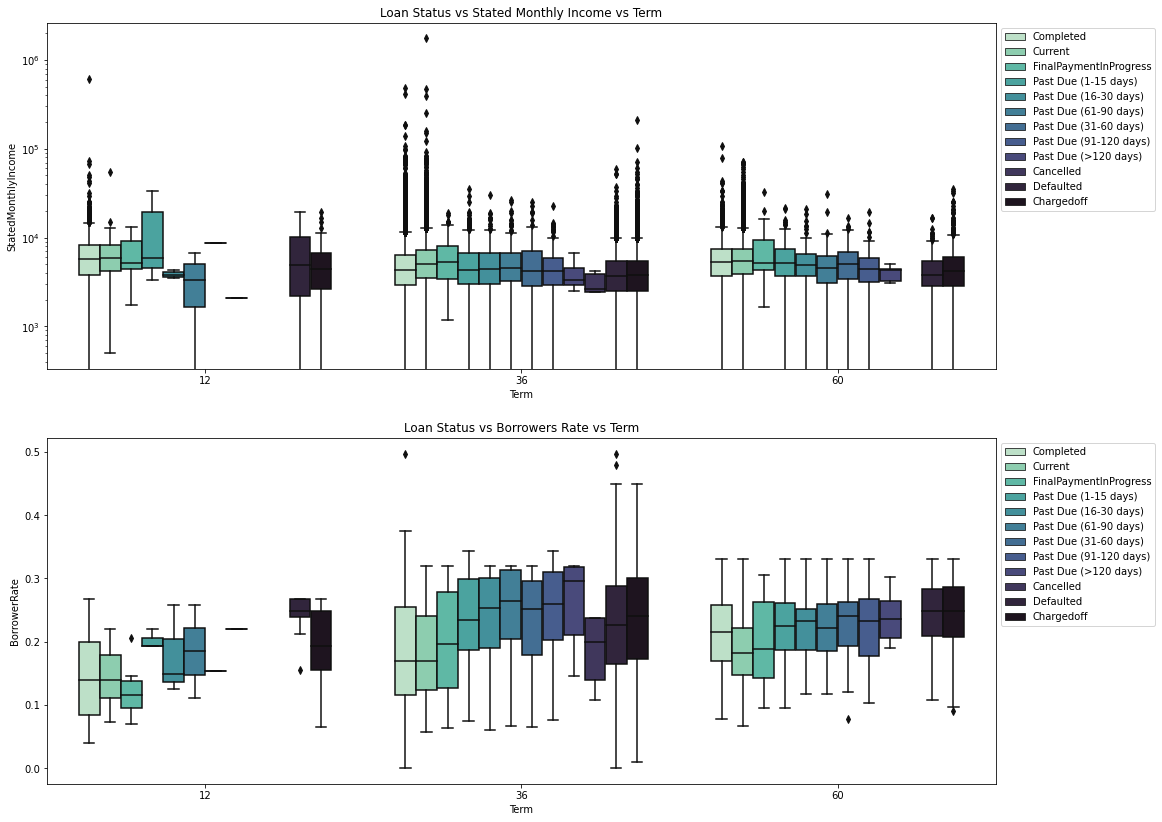

In [30]:
plt.figure(figsize=[17,14])
plt.subplot(2,1,1)
sb.boxplot(data=df, x='Term', y='StatedMonthlyIncome',color=base_color,hue='LoanStatus',palette='mako_r')
plt.yscale('log')
plt.title('Loan Status vs Stated Monthly Income vs Term')
plt.legend(bbox_to_anchor=(1,1))
plt.subplot(2,1,2)
sb.boxplot(data=df, x='Term', y='BorrowerRate',color=base_color,hue='LoanStatus',palette='mako_r')
plt.title('Loan Status vs Borrowers Rate vs Term')
plt.legend(bbox_to_anchor=(1,1));

It clearly shows here that for the 36 months term, the lower the borrower rate the more likely it is to complete the loan and the higher the borrower rates the higher the past due days

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> It can be seen that there are various outliers in the defaulted and charged off category with high borrower's rate. it was also found out that the borrower rates affect the Loan status, the higher the rates the more likely it is to have missing payments or deliquency of loans. this is more evident when looking at the different loan term categories. it shows clearly in the 36 months term. 
### Were there any interesting or surprising interactions between features?
> It also shows that the borrowers working full time in the 36 months term have the highest defaulted and charged off loans

## Conclusions
>From my investigation it shows that indeed the borrower rates has the highest effect on the Loan status, the higher the rates the more likely it is to have missing payments or deliquency of loans. this is more evident when looking at the different loan term categories. it shows clearly in the 36 months term that with higher borrower rate the days of deliquency increases but defaulted or charged off loans are lower. where as in the longer term category which is the 60 months term that the defaulted and charged off loans have the highest borrowers rate. It also shows that the borrowers working full time in the 36 months term have the highest defaulted and charged off loans